<ipython-input-16-5c7e38236642>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('GA_180123.csv')
<ipython-input-16-5c7e38236642>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  traffic_analysis = df.groupby('Source / Medium')['Users', 'Avg. Session Duration'].mean().reset_index()


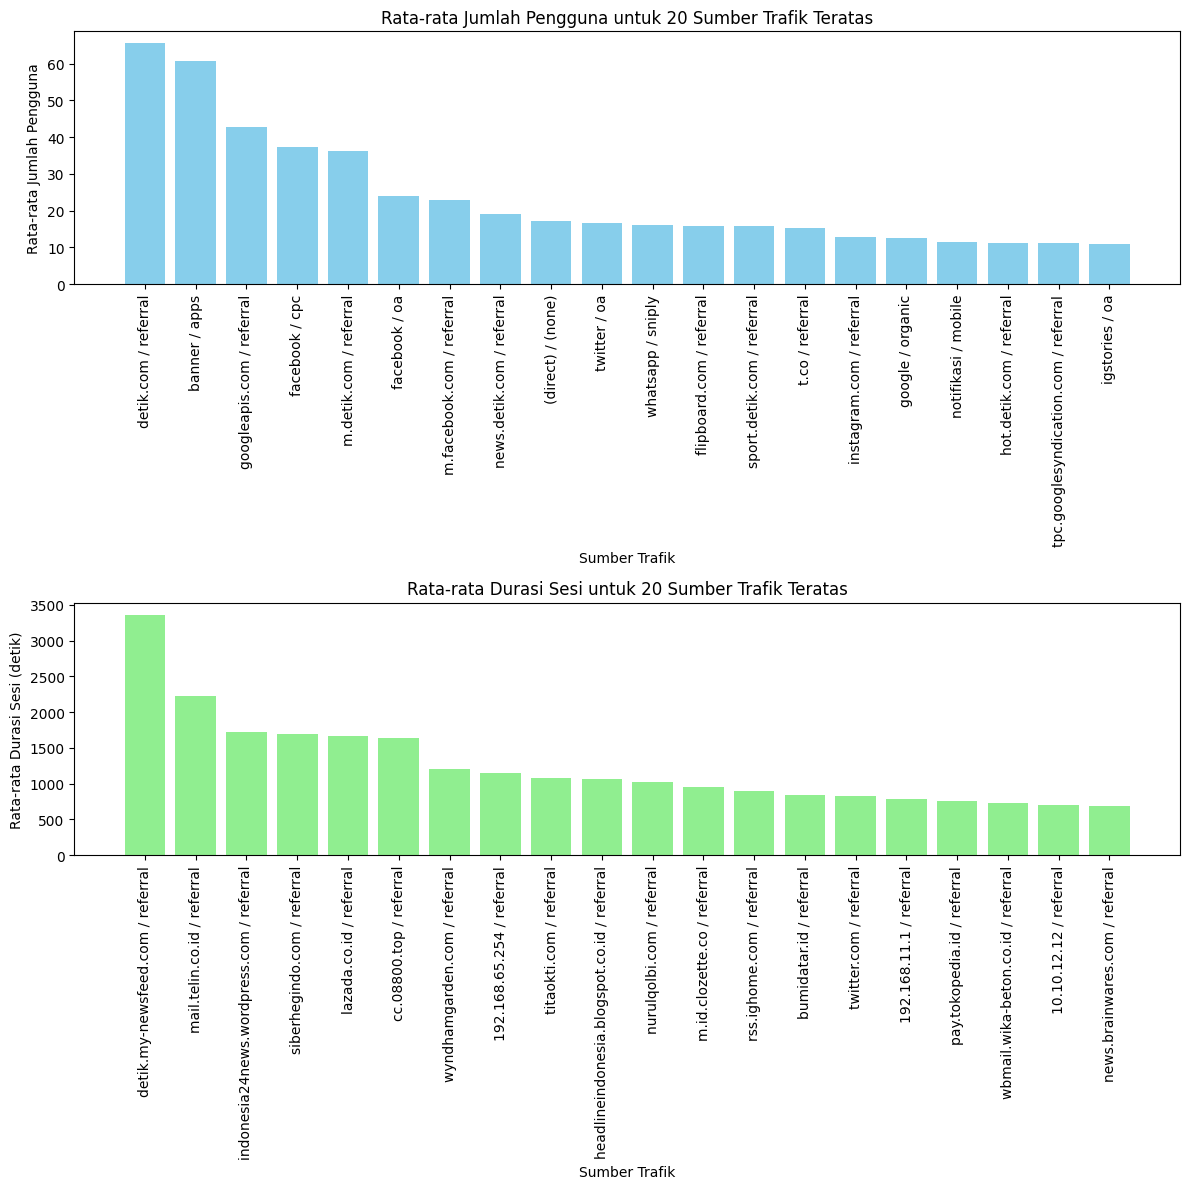

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('GA_180123.csv')

#analisis sumber trafik
traffic_analysis = df.groupby('Source / Medium')['Users', 'Avg. Session Duration'].mean().reset_index()

# Mengambil sampel 20 sumber trafik teratas berdasarkan rata-rata jumlah pengguna
top_traffic = traffic_analysis.nlargest(20, 'Users')
top_traffic1 = traffic_analysis.nlargest(20, 'Avg. Session Duration')

# Visualisasi
plt.figure(figsize=(12, 12))

# Bar plot untuk rata-rata pengguna
plt.subplot(2, 1, 1)
plt.bar(top_traffic['Source / Medium'], top_traffic['Users'], color='skyblue')
plt.title('Rata-rata Jumlah Pengguna untuk 20 Sumber Trafik Teratas')
plt.xlabel('Sumber Trafik')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.xticks(rotation=90)
plt.tight_layout()

# Bar plot untuk rata-rata durasi sesi
plt.subplot(2, 1, 2)
plt.bar(top_traffic1['Source / Medium'], top_traffic1['Avg. Session Duration'], color='lightgreen')
plt.title('Rata-rata Durasi Sesi untuk 20 Sumber Trafik Teratas')
plt.xlabel('Sumber Trafik')
plt.ylabel('Rata-rata Durasi Sesi (detik)')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

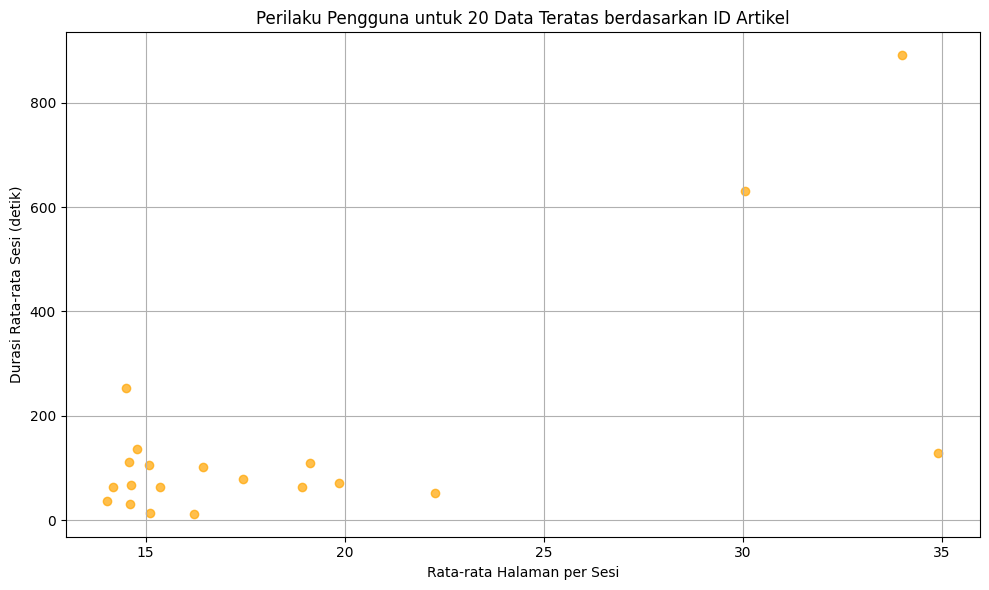

In [ ]:
single_page_news = df[df['contenttype'] == 'singlepagenews']

# Analisis berdasarkan ID artikel yang sama
article_analysis = single_page_news.groupby('articleid')[['Pages / Session', 'Avg. Session Duration']].mean().reset_index()

# Mengambil 20 data teratas berdasarkan rata-rata halaman per sesi
top_20_articles = article_analysis.nlargest(20, 'Pages / Session')

# Visualisasi
plt.figure(figsize=(10, 6))

# Scatter plot rata-rata halaman per sesi dan durasi rata-rata sesi untuk 20 data teratas
plt.scatter(top_20_articles['Pages / Session'], top_20_articles['Avg. Session Duration'], alpha=0.7, color='orange')
plt.title('Perilaku Pengguna untuk 20 Data Teratas berdasarkan ID Artikel')
plt.xlabel('Rata-rata Halaman per Sesi')
plt.ylabel('Durasi Rata-rata Sesi (detik)')
plt.grid(True)
plt.tight_layout()

plt.show()

<ipython-input-13-aca80967dd90>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


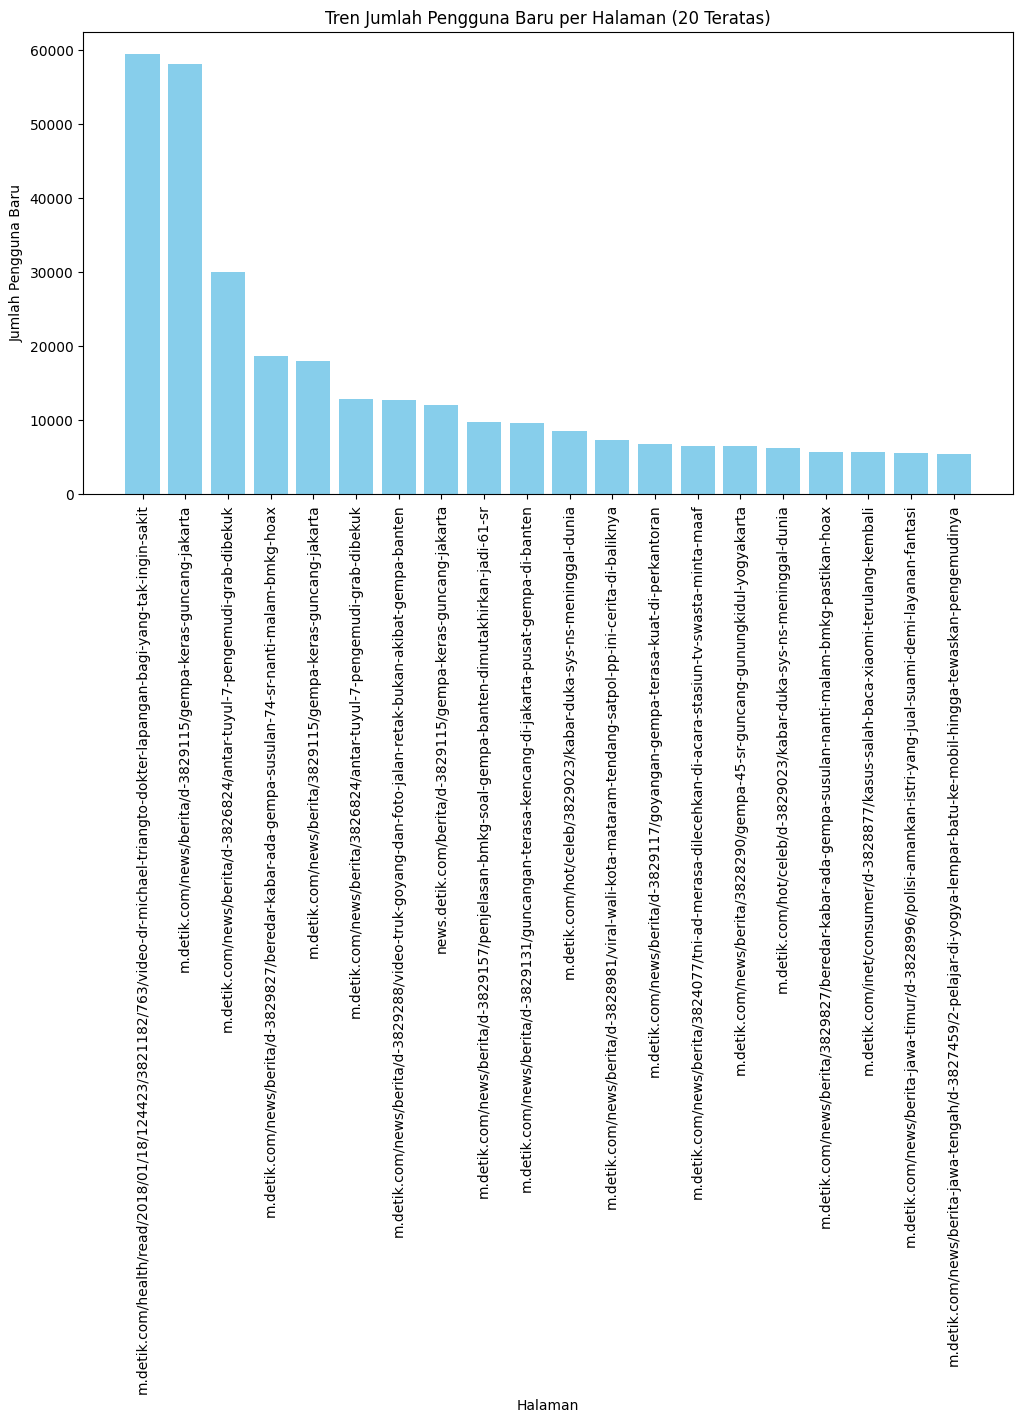

In [ ]:
# Analisis tren jumlah pengguna baru per halaman
new_users_trend = df.groupby('Page')['New Users'].sum().reset_index()

# Pengurutan berdasarkan jumlah pengguna baru dari besar ke kecil
new_users_trend = new_users_trend.sort_values(by='New Users', ascending=False)

# Visualisasi tren jumlah pengguna baru per halaman
plt.figure(figsize=(12, 6))
plt.bar(new_users_trend['Page'][:20], new_users_trend['New Users'][:20], color='skyblue')
plt.title('Tren Jumlah Pengguna Baru per Halaman (20 Teratas)')
plt.xlabel('Halaman')
plt.ylabel('Jumlah Pengguna Baru')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

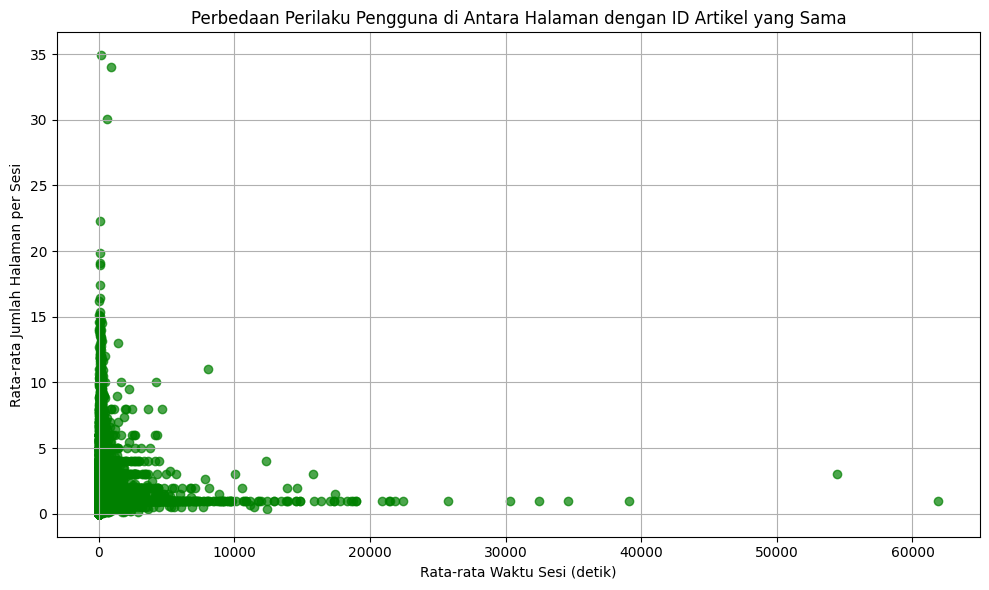

In [ ]:

# Filter data hanya untuk jenis konten 'singlepagenews'
single_page_news = df[df['contenttype'] == 'singlepagenews']

# Analisis berdasarkan ID artikel yang sama
behavior_analysis = single_page_news.groupby('articleid').agg({
    'Avg. Session Duration': 'mean',
    'Pages / Session': 'mean',
}).reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))

# Scatter plot rata-rata waktu sesi dan rata-rata jumlah halaman per sesi
plt.scatter(behavior_analysis['Avg. Session Duration'], behavior_analysis['Pages / Session'], alpha=0.7, color='green')
plt.title('Perbedaan Perilaku Pengguna di Antara Halaman dengan ID Artikel yang Sama')
plt.xlabel('Rata-rata Waktu Sesi (detik)')
plt.ylabel('Rata-rata Jumlah Halaman per Sesi')
plt.grid(True)
plt.tight_layout()

plt.show()

<ipython-input-21-fc4ec4995ac9>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


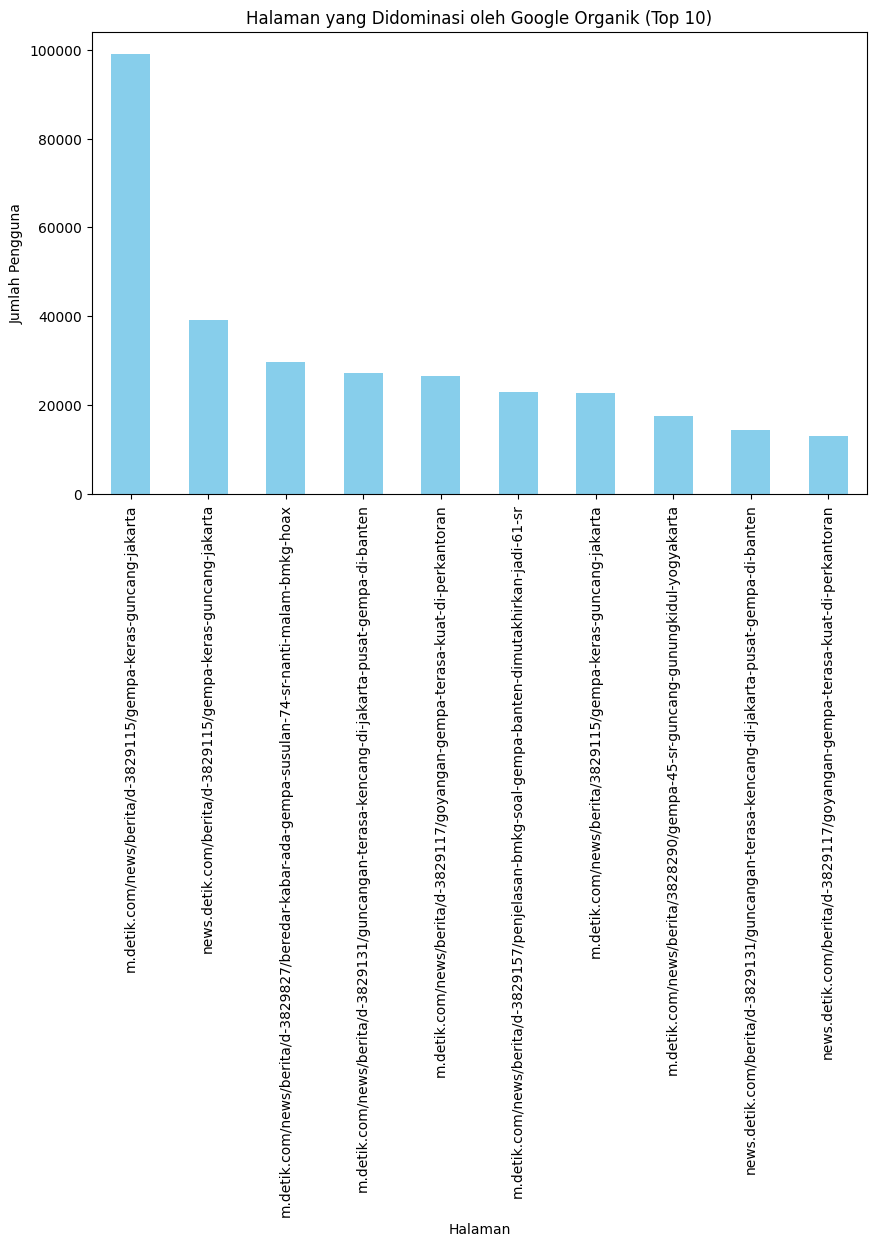

<ipython-input-21-fc4ec4995ac9>:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


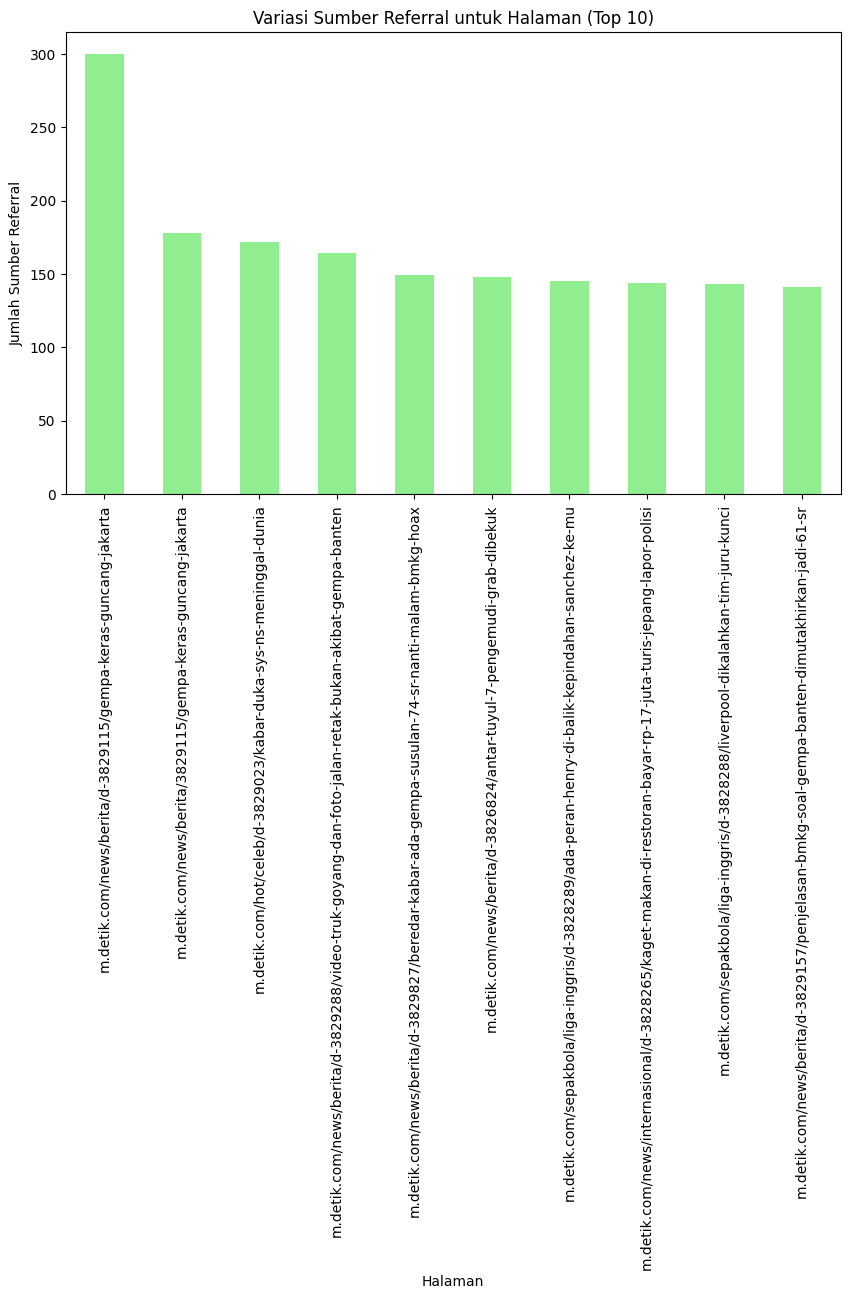

In [ ]:

# Filter data hanya untuk jenis konten 'singlepagenews'
single_page_news = df[df['contenttype'] == 'singlepagenews']

# Analisis sumber trafik
traffic_analysis = single_page_news.groupby(['Page', 'Source / Medium'])['Users'].sum().reset_index()

# Membuat kolom baru untuk mengidentifikasi apakah sumber trafik adalah Google Organik
traffic_analysis['Is Google Organic'] = traffic_analysis['Source / Medium'].str.contains('google / organic', case=False)

# Mendapatkan halaman yang didominasi oleh Google Organik
dominated_by_google = traffic_analysis[traffic_analysis['Is Google Organic']].groupby('Page')['Users'].sum().sort_values(ascending=False).head(10)

# Mencari variasi sumber referral untuk setiap halaman
varied_referral_sources = traffic_analysis[~traffic_analysis['Is Google Organic']].groupby('Page')['Source / Medium'].nunique().sort_values(ascending=False).head(10)

# Visualisasi halaman yang didominasi oleh Google Organik
plt.figure(figsize=(10, 6))
dominated_by_google.plot(kind='bar', color='skyblue')
plt.title('Halaman yang Didominasi oleh Google Organik (Top 10)')
plt.xlabel('Halaman')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualisasi variasi sumber referral untuk halaman-halaman tertentu
plt.figure(figsize=(10, 6))
varied_referral_sources.plot(kind='bar', color='lightgreen')
plt.title('Variasi Sumber Referral untuk Halaman (Top 10)')
plt.xlabel('Halaman')
plt.ylabel('Jumlah Sumber Referral')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

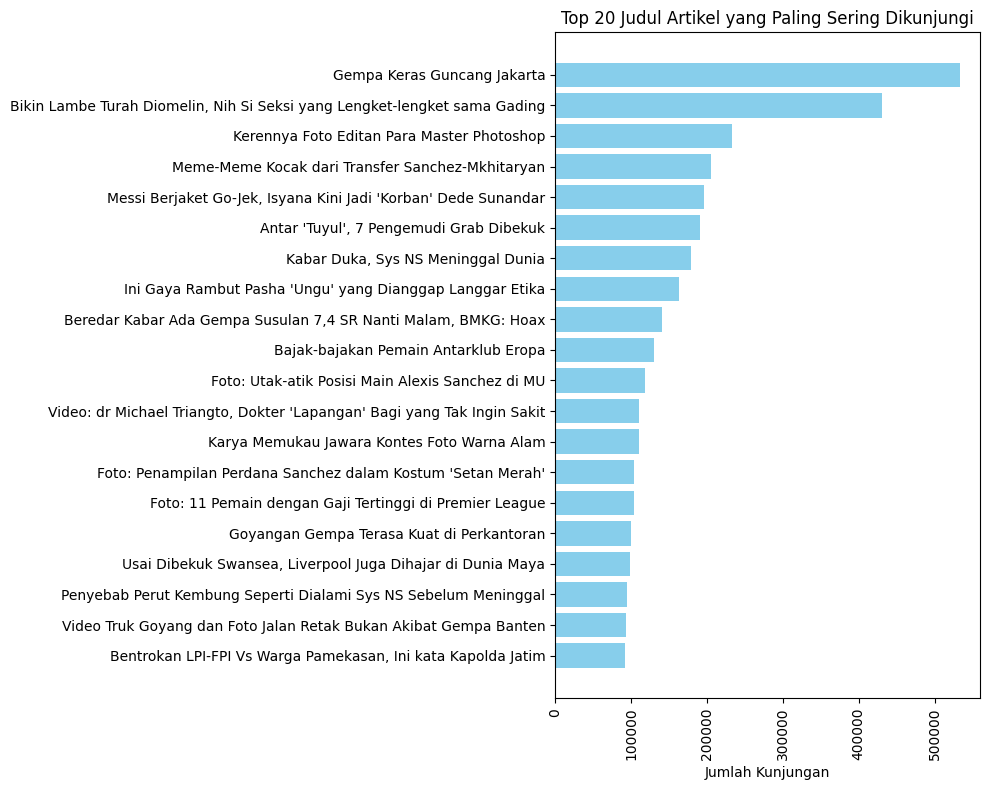

In [ ]:

# Mengelompokkan berdasarkan judul artikel dan menghitung total jumlah kunjungan
article_views = df.groupby('Page Title')['Pageviews'].sum().reset_index()

# Mengurutkan artikel berdasarkan jumlah kunjungan secara menurun
top_20_articles = article_views.sort_values(by='Pageviews', ascending=False).head(20)

# Visualisasi 20 judul artikel yang paling sering dikunjungi
plt.figure(figsize=(10, 8))
plt.barh(top_20_articles['Page Title'], top_20_articles['Pageviews'], color='skyblue')
plt.xlabel('Jumlah Kunjungan')
plt.title('Top 20 Judul Artikel yang Paling Sering Dikunjungi')
plt.gca().invert_yaxis()  # Membalik urutan judul agar yang paling sering dikunjungi berada di bagian atas
plt.tight_layout()
plt.show()

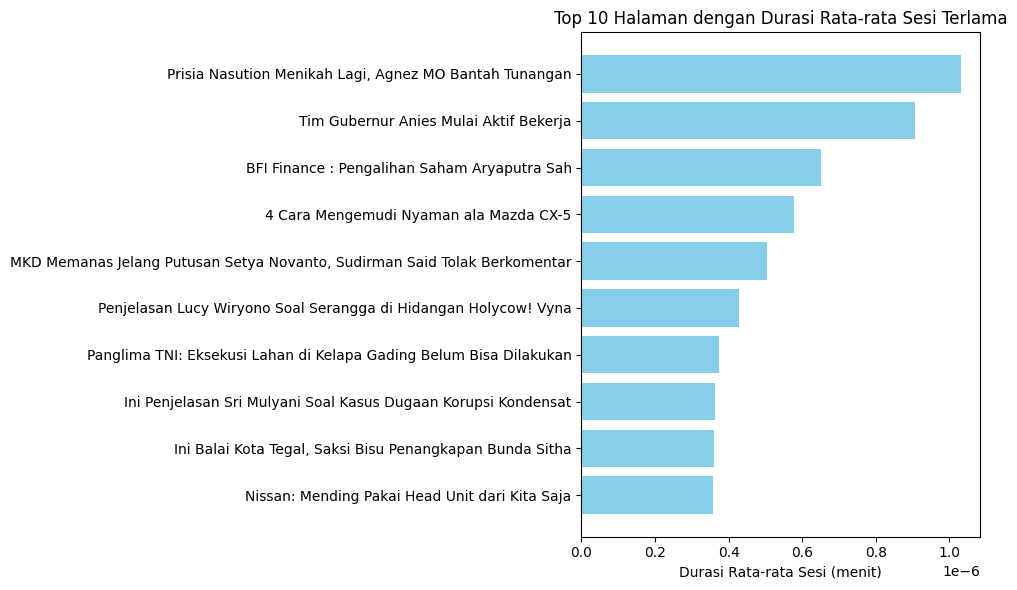

In [ ]:


# Mengkonversi kolom 'Avg. Session Duration' ke dalam tipe data waktu
df['Avg. Session Duration'] = pd.to_timedelta(df['Avg. Session Duration'])

# Menghitung rata-rata durasi sesi per halaman
avg_session_per_page = df.groupby('Page Title')['Avg. Session Duration'].mean().reset_index()

# Mengurutkan halaman berdasarkan rata-rata durasi sesi secara menurun
longest_avg_duration = avg_session_per_page.sort_values(by='Avg. Session Duration', ascending=False).head(10)

# Visualisasi 10 halaman dengan durasi rata-rata sesi terlama
plt.figure(figsize=(10, 6))
plt.barh(longest_avg_duration['Page Title'], longest_avg_duration['Avg. Session Duration'].dt.total_seconds() / 60, color='skyblue')
plt.xlabel('Durasi Rata-rata Sesi (menit)')
plt.title('Top 10 Halaman dengan Durasi Rata-rata Sesi Terlama')
plt.gca().invert_yaxis()  # Membalik urutan halaman agar yang terlama berada di bagian atas
plt.tight_layout()
plt.show()